In [30]:
import numpy as np
import pandas as pd
import keras
from keras.models import load_model

In [31]:
dataset_dir = "./dataset/"
test_data = np.load(dataset_dir + "test_dataset.npy")

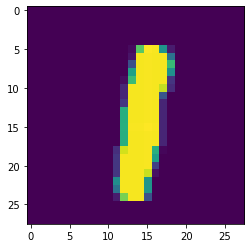

In [32]:
import matplotlib.pyplot as plt

plt.imshow(test_data[0])

In [33]:
model = load_model(dataset_dir + "model_2021_11_15_14_51_56.h5")

In [34]:
prediction_probability = model.predict(test_data)

In [37]:
prediction_label = []

for i in range(len(prediction_probability)):
    prediction_label.append(np.argmax(prediction_probability[i]))

1


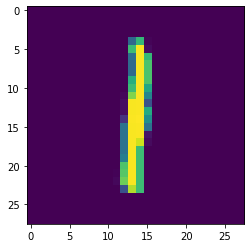

In [38]:
import random

i = random.randrange(0, 5000)

print(prediction_label[i])
plt.imshow(test_data[i])

In [39]:
sample_submission = pd.read_csv(dataset_dir + "sample_submission.csv")

In [44]:
for i in range(len(sample_submission)):
    sample_submission['label'][i] = prediction_label[i]

C:\Users\user\anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
sample_submission

,file_name,label
0,idx0001.png,1
1,idx0002.png,0
2,idx0003.png,8
3,idx0004.png,3
4,idx0005.png,5
...,...,...
4995,idx4996.png,9
4996,idx4997.png,2
4997,idx4998.png,5
4998,idx4999.png,9


In [46]:
pd.DataFrame.to_csv(sample_submission, dataset_dir + "plover_submission.csv", index = False)